In [1]:
library(knitr)
library(dplyr)
library(Seurat)
library(reticulate)
library(scales)
library(DT)
set.seed(1234)
options(repr.plot.width=14, repr.plot.height=10)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘DT’


The following object is masked from ‘package:Seurat’:

    JS




In [2]:
arg01 <- "tenx" #library name: tenx, dropseq, mca
arg02 <- "filtered_feature_bc_matrix/" #10X directory, dropseq / mca count matrix
arg03 <- "1_intact" #project name
arg04 <- "1_intact.rds"  #output file name for saveRDS function

In [3]:
switch(arg01,
    "tenx" = tmp.data <- Read10X(data.dir = arg02),
    "dropseq" = tmp.data <- read.table(arg02, sep = "\t", header=T, row.names=1),
    "mca" = tmp.data <- read.table(arg02, sep = "\t", header=T, row.names=1),
    print("You have chosen undefined library parameter"))
tmp <- CreateSeuratObject(counts = tmp.data, project = arg03, min.cells = 3)
print(tmp)

An object of class Seurat 
21654 features across 12234 samples within 1 assay 
Active assay: RNA (21654 features)


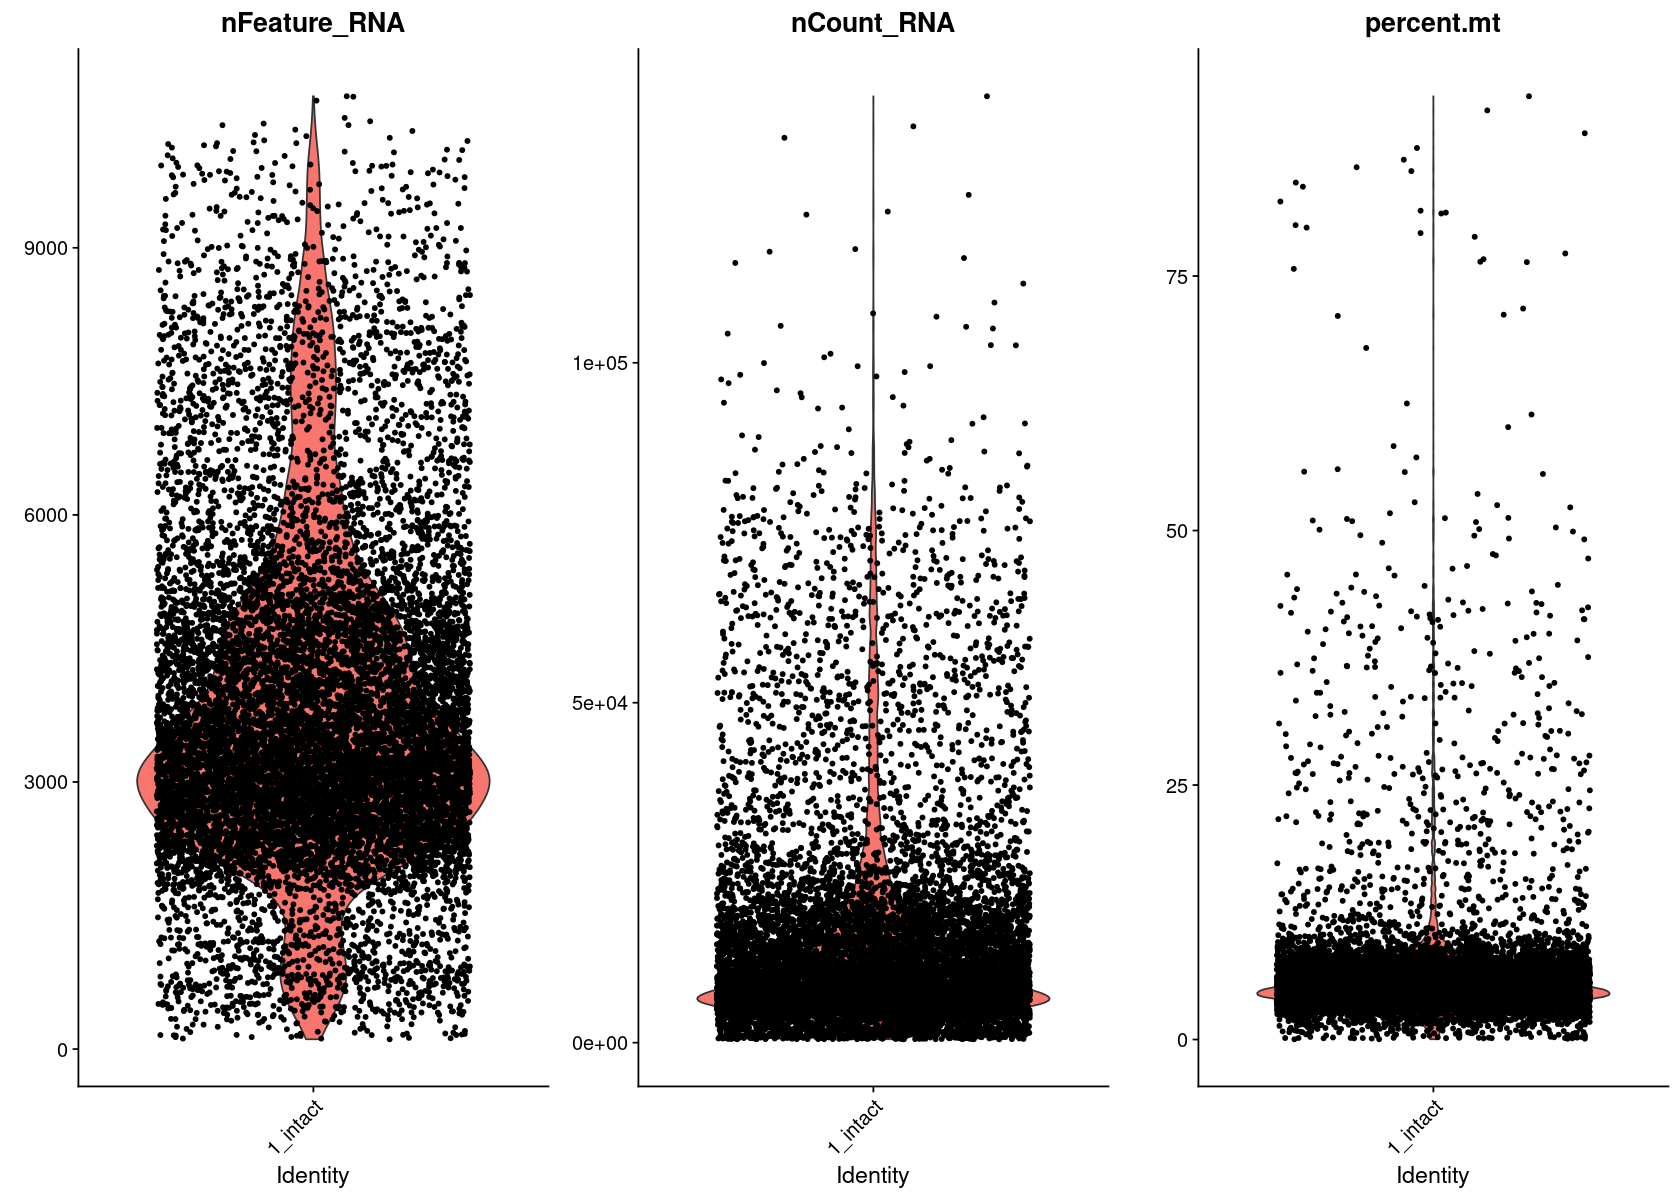

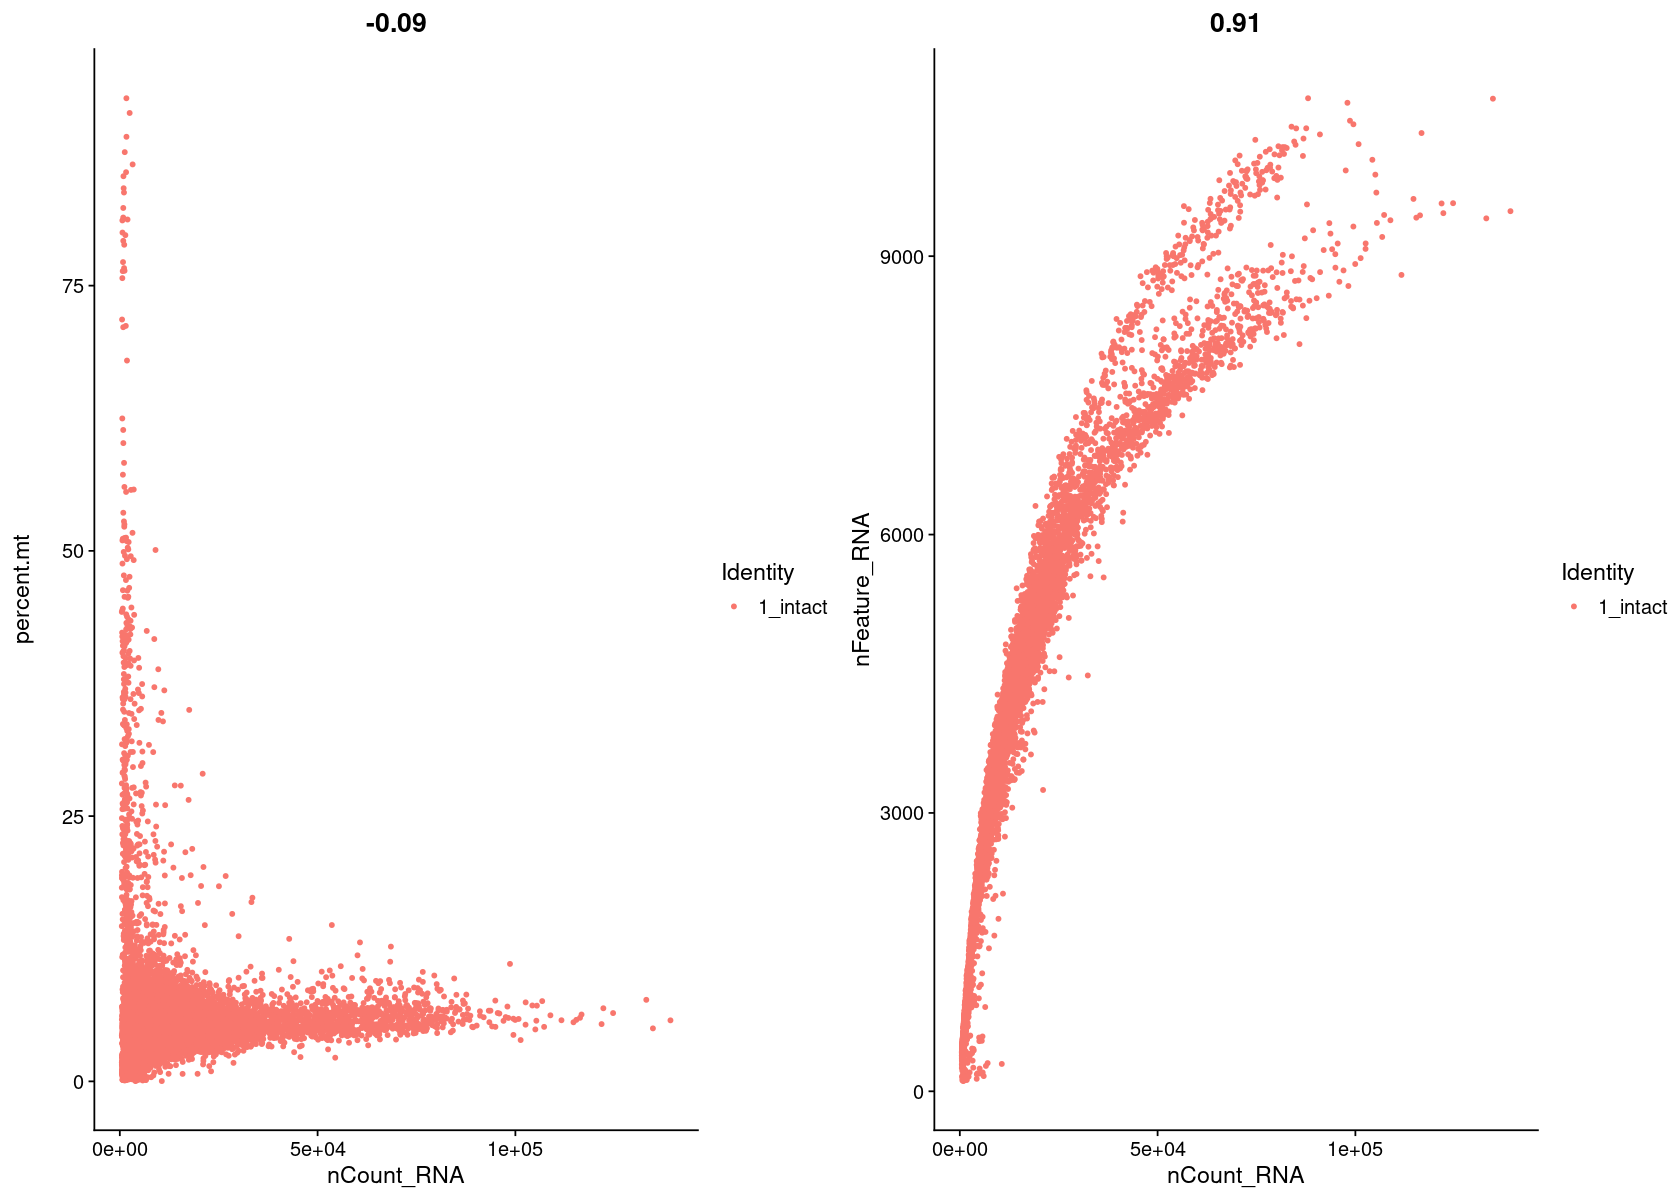

In [4]:
tmp[["percent.mt"]] <- PercentageFeatureSet(tmp, pattern="^mt-")
VlnPlot(tmp, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

plot1 <- FeatureScatter(tmp, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(tmp, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
CombinePlots(plots = list(plot1, plot2))

In [5]:
arg05 <- 100 #nFeature_RNA_min
arg06 <- 10000 #nFeature_RNA_max
arg07 <- 5 #nCount_RNA_min
arg08 <- 100000 #nCount_RNA_max
arg09 <- 50 #percent.mt_max

An object of class Seurat 
21654 features across 12136 samples within 1 assay 
Active assay: RNA (21654 features)


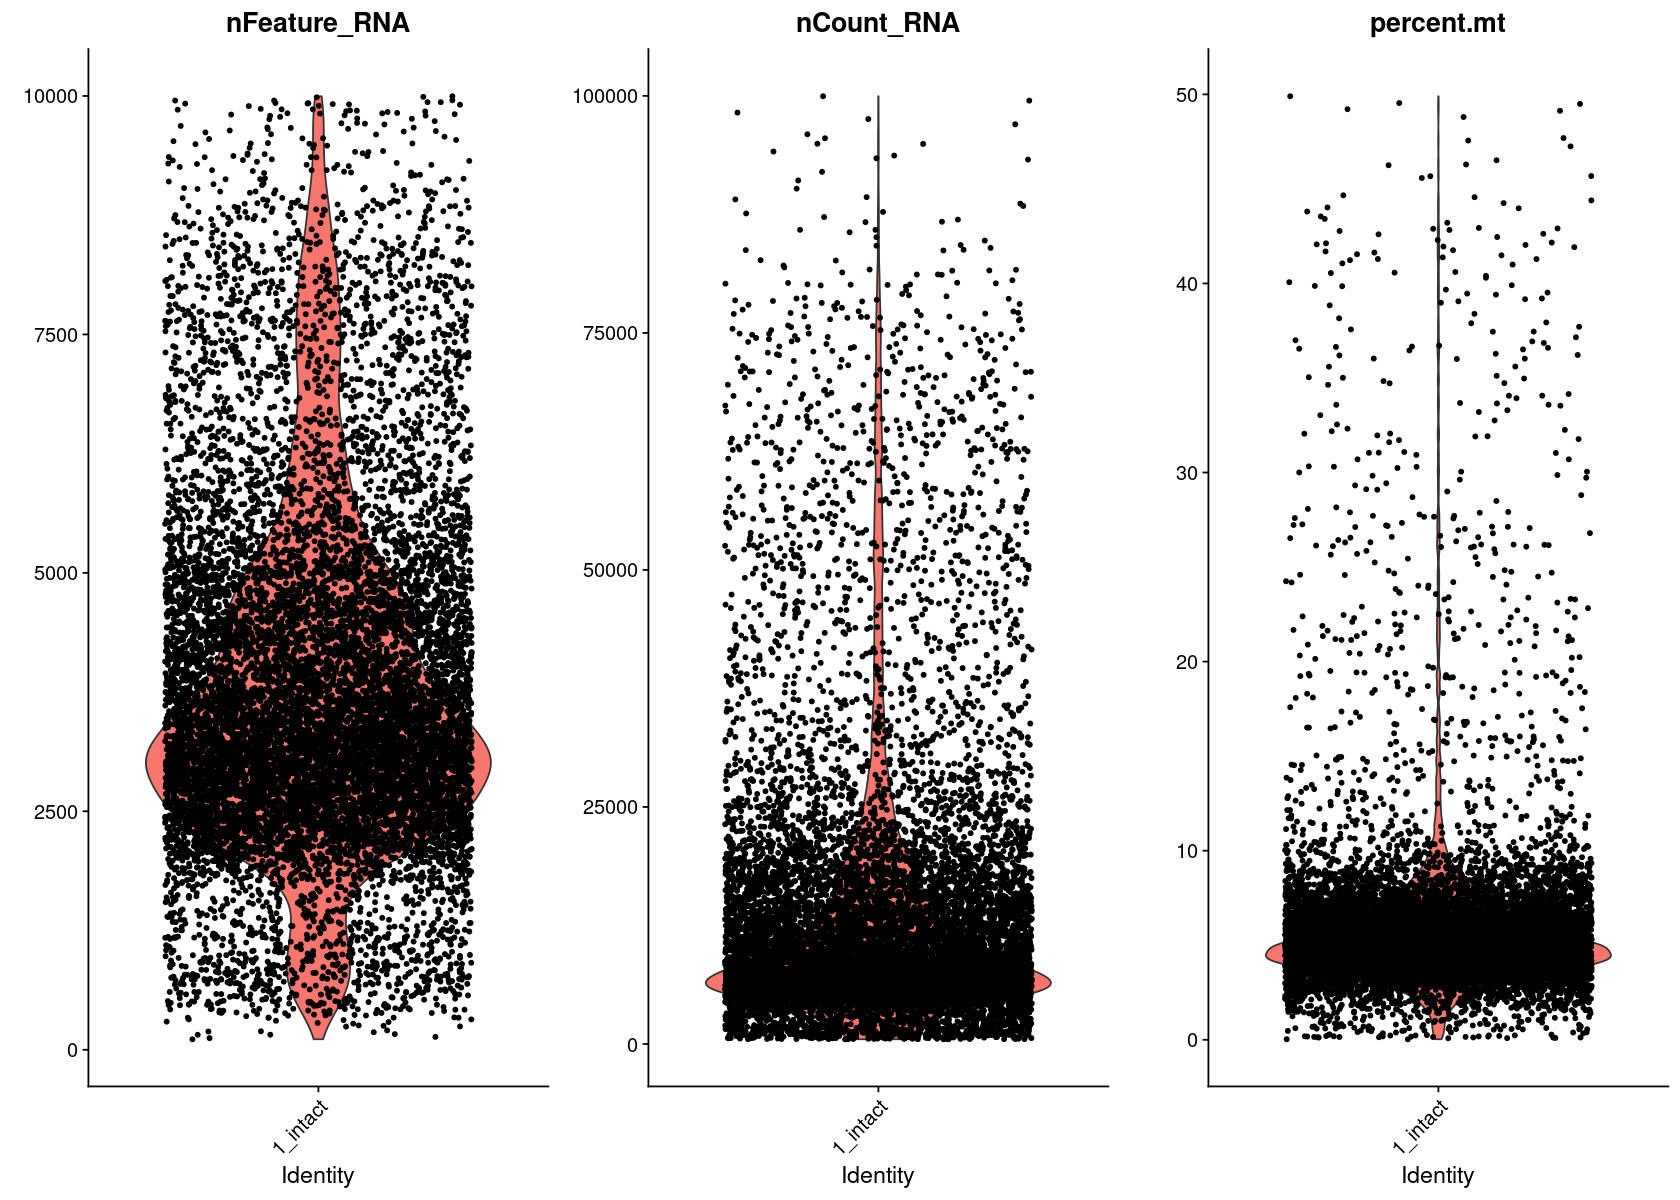

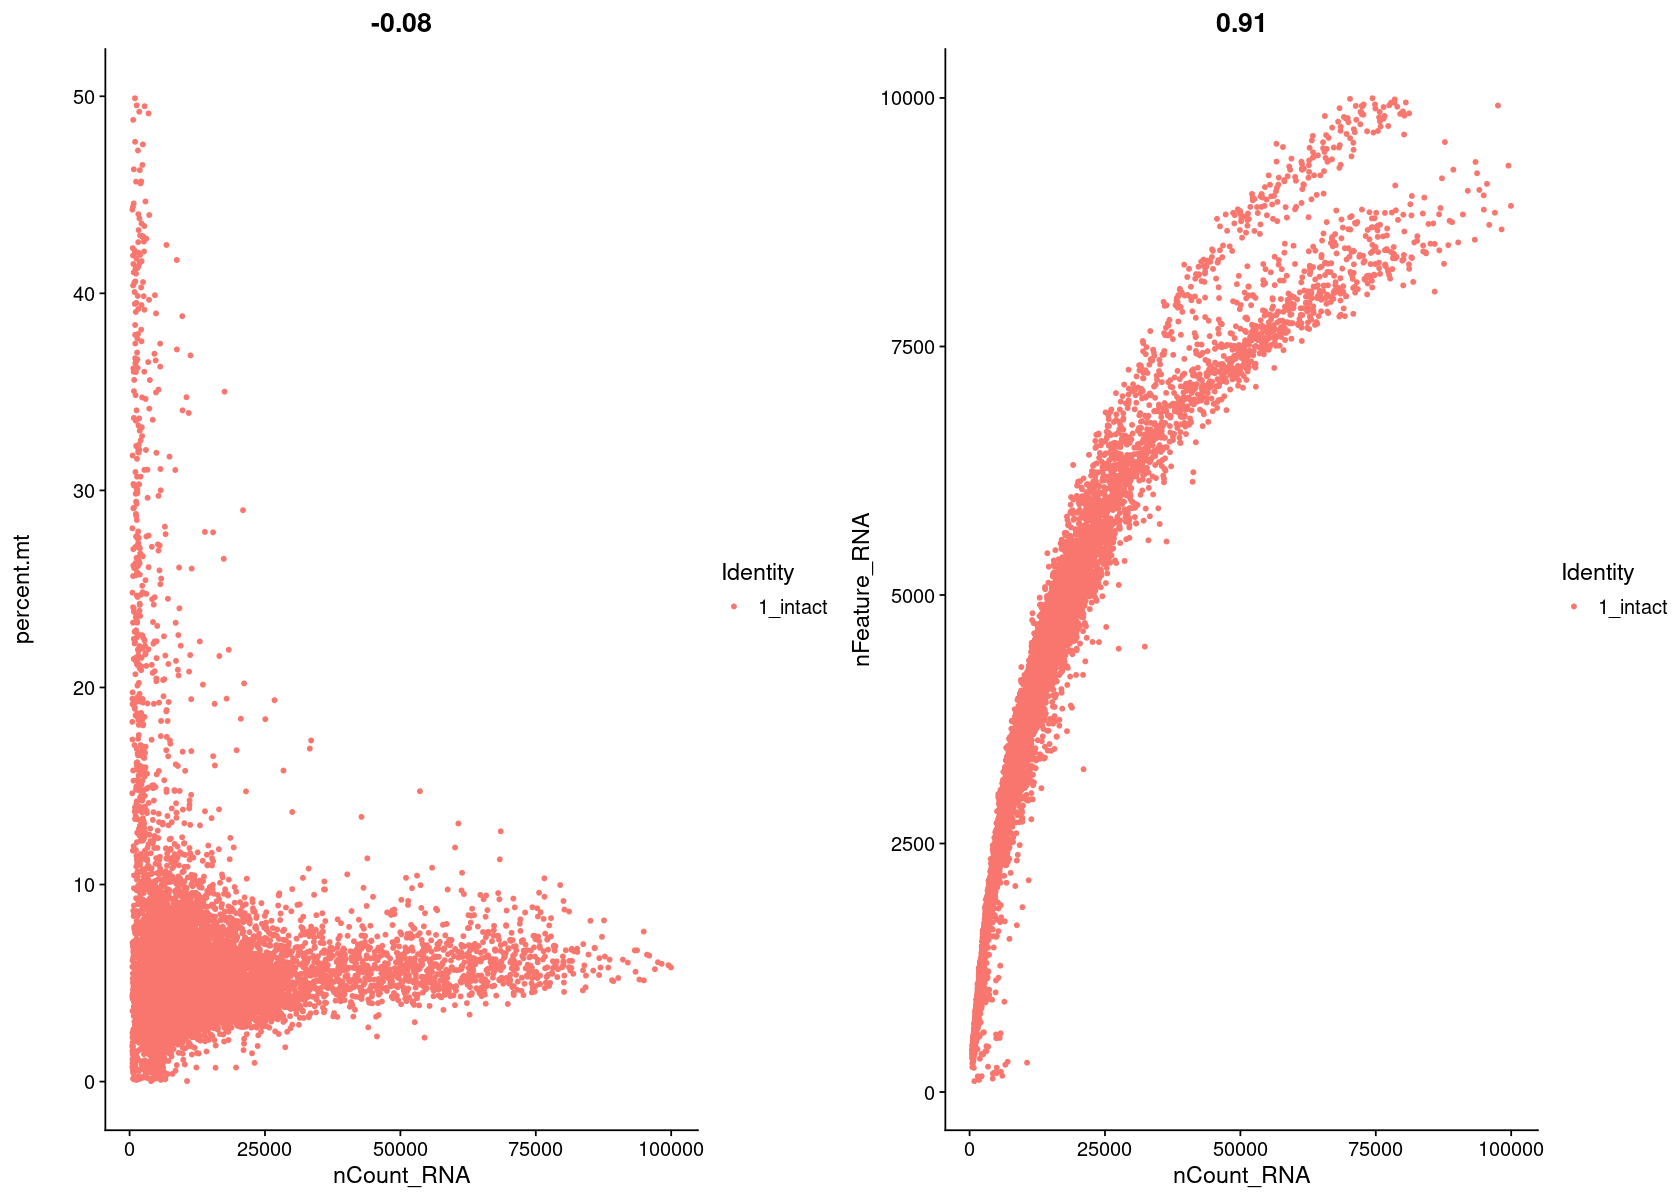

In [6]:
tmp <- subset(tmp, subset = nFeature_RNA > arg05 & nFeature_RNA < arg06 & nCount_RNA > arg07 & nCount_RNA < arg08 & percent.mt < arg09)
print(tmp)
VlnPlot(tmp, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

plot1 <- FeatureScatter(tmp, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(tmp, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
CombinePlots(plots = list(plot1, plot2))

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”
When using repel, set xnudge and ynudge to 0 for optimal results



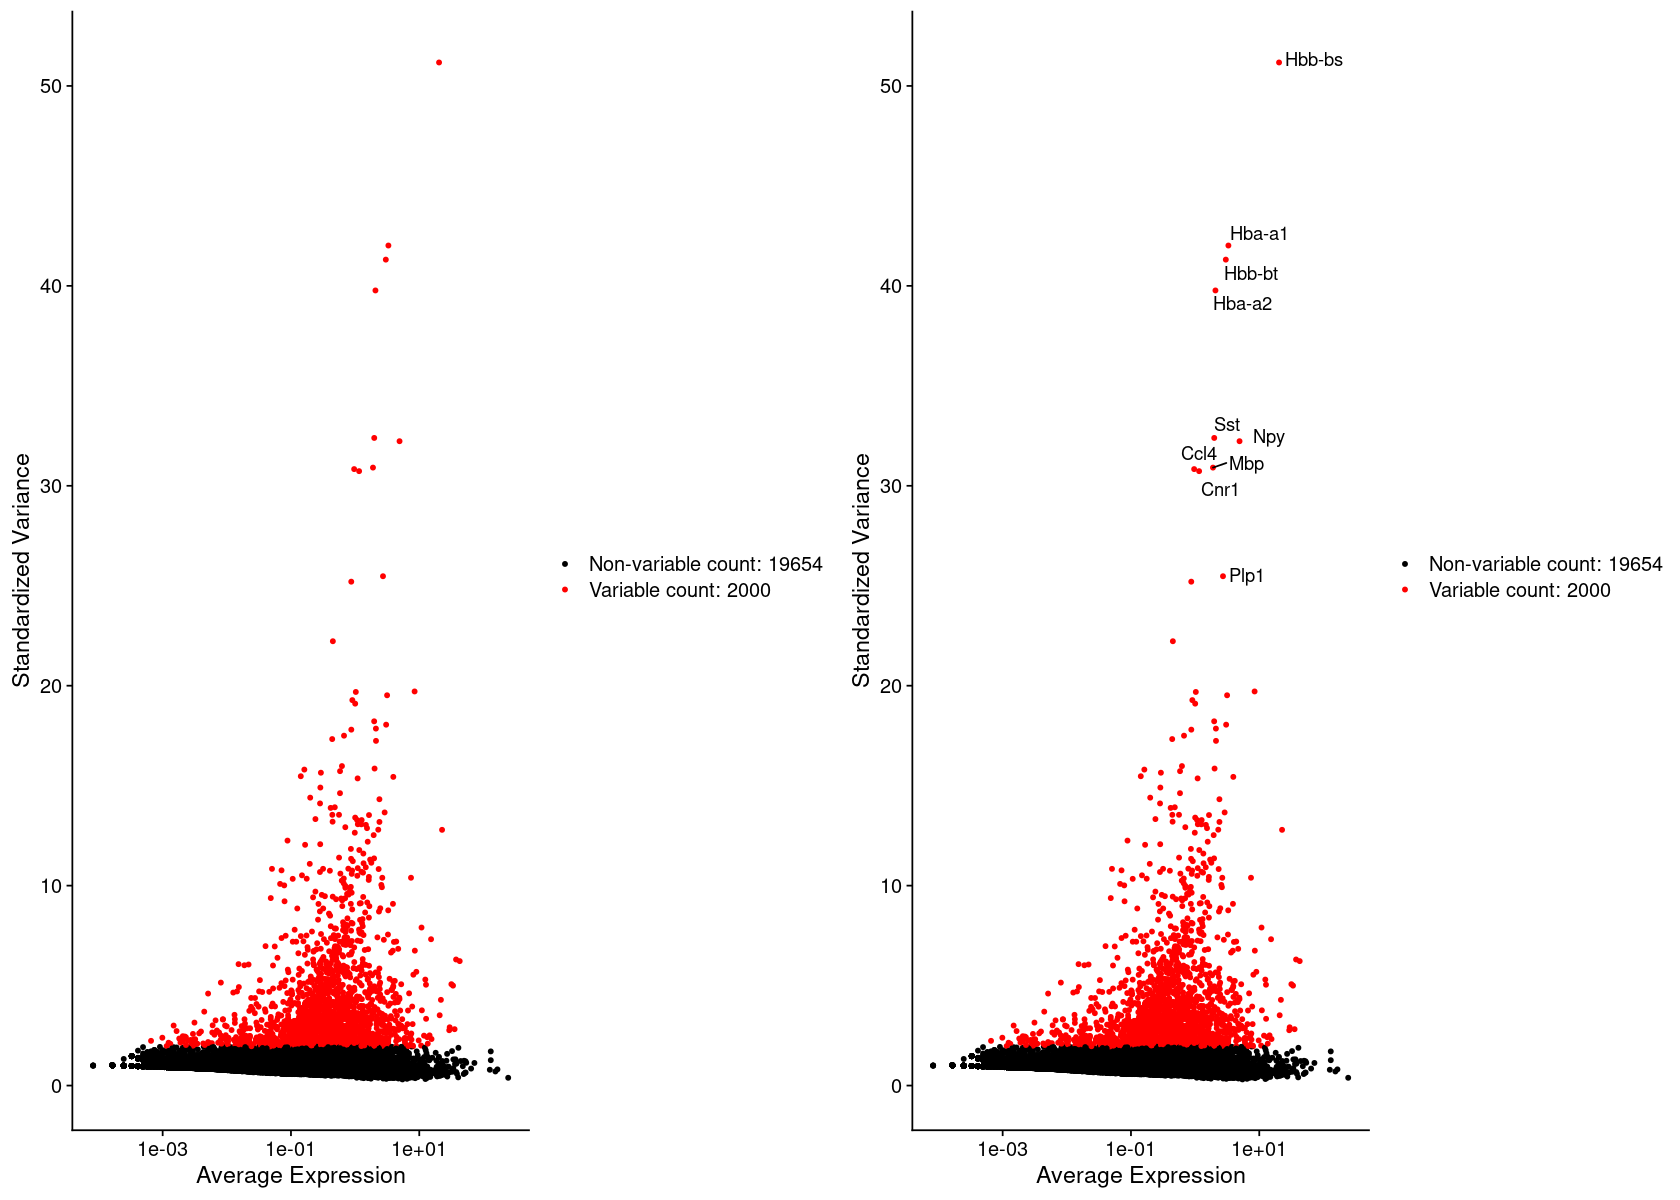

In [7]:
tmp <- NormalizeData(tmp, normalization.method = "LogNormalize", scale.factor = 10000)
tmp <- FindVariableFeatures(tmp, selection.method = "vst", nfeatures = 2000)
top10 <- head(VariableFeatures(tmp), 10)

plot1 <- VariableFeaturePlot(tmp)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
options(repr.plot.width=14)
CombinePlots(plots = list(plot1, plot2))

Regressing out percent.mt

Centering and scaling data matrix

PC_ 1 
Positive:  Ccdc153, Tm4sf1, Rsph1, 1110017D15Rik, Meig1, Ak7, 1700007K13Rik, 1700016K19Rik, 1700012B09Rik, Cfap206 
	   Fam183b, Tmem212, Cfap126, Dnah12, Dynlrb2, Gm867, Dnah9, Lrrc23, Efcab10, Dmkn 
	   Cfap54, Dnah6, Hdc, 1700001C02Rik, Dnali1, Spef2, Tctex1d4, Odf3b, Pifo, Ccdc113 
Negative:  Basp1, Dpysl3, Stmn3, Crmp1, Stmn2, Mllt11, Ttc9b, Rtn1, Stmn4, Elavl2 
	   Mapt, Celf4, Gng3, Aplp1, Myt1l, Bex2, Map1b, Rab3a, Kif5a, Ina 
	   Ywhag, Pdxp, Olfm1, Kif5c, Gap43, Eid1, Pcdh9, Cnrip1, Nell2, Klc1 
PC_ 2 
Positive:  Rtn1, Arhgdig, Bex2, Ly6h, Plppr4, Nnat, Stmn3, Fam81a, Atp1b1, Zcchc18 
	   Elmod1, Cxadr, C1qtnf4, Snhg11, Cnih2, Dnajc6, Sncb, Caly, Ndn, Gnal 
	   Celf4, Gap43, Mllt11, 1700001L19Rik, Syt1, Cdkl2, Pcsk1n, Basp1, Scn2a, Diras2 
Negative:  Eng, Esam, Foxq1, Flt1, Cldn5, Cd93, BC028528, Adgrf5, Ctla2a, Cdh5 
	   Adgrl4, Ecscr, Ptprb, Slc22a8, Vwa1, Kdr, Slc40a1, Fn1, AU021092, Nid1 
	   Igfbp7, Slc

PC_ 1 
Positive:  Ccdc153, Tm4sf1, Rsph1, 1110017D15Rik, Meig1 
Negative:  Basp1, Dpysl3, Stmn3, Crmp1, Stmn2 
PC_ 2 
Positive:  Rtn1, Arhgdig, Bex2, Ly6h, Plppr4 
Negative:  Eng, Esam, Foxq1, Flt1, Cldn5 
PC_ 3 
Positive:  Sncb, Fxyd7, Syt1, Slc17a7, Snhg11 
Negative:  Ezr, Hmgb2, Sox9, Jun, Pclaf 
PC_ 4 
Positive:  Tsc22d1, Rtn1, Cald1, Nnat, Lrp8 
Negative:  C1qa, C1qc, Csf1r, C1qb, Fcer1g 
PC_ 5 
Positive:  Aldoc, Atp1a2, Fabp7, Slc1a2, Gfap 
Negative:  Calm2, Nudt4, Basp1, Cdca8, Top2a 


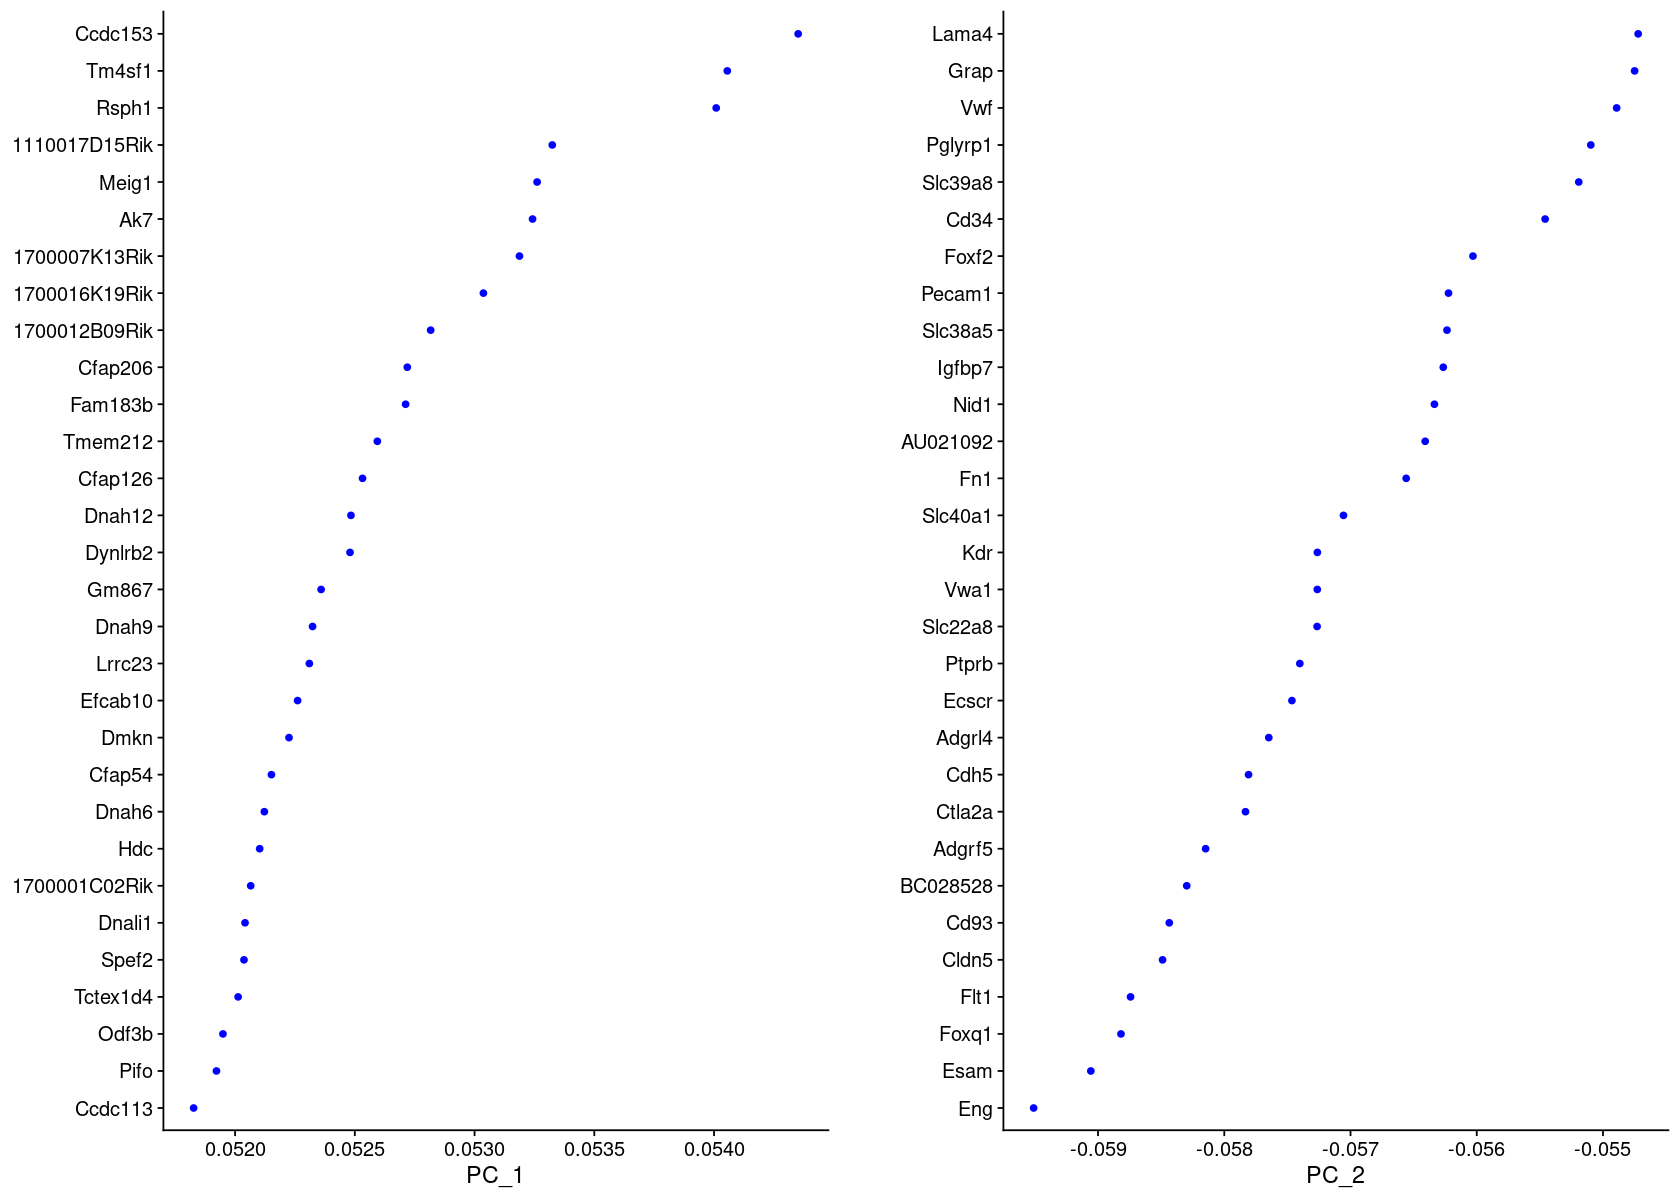

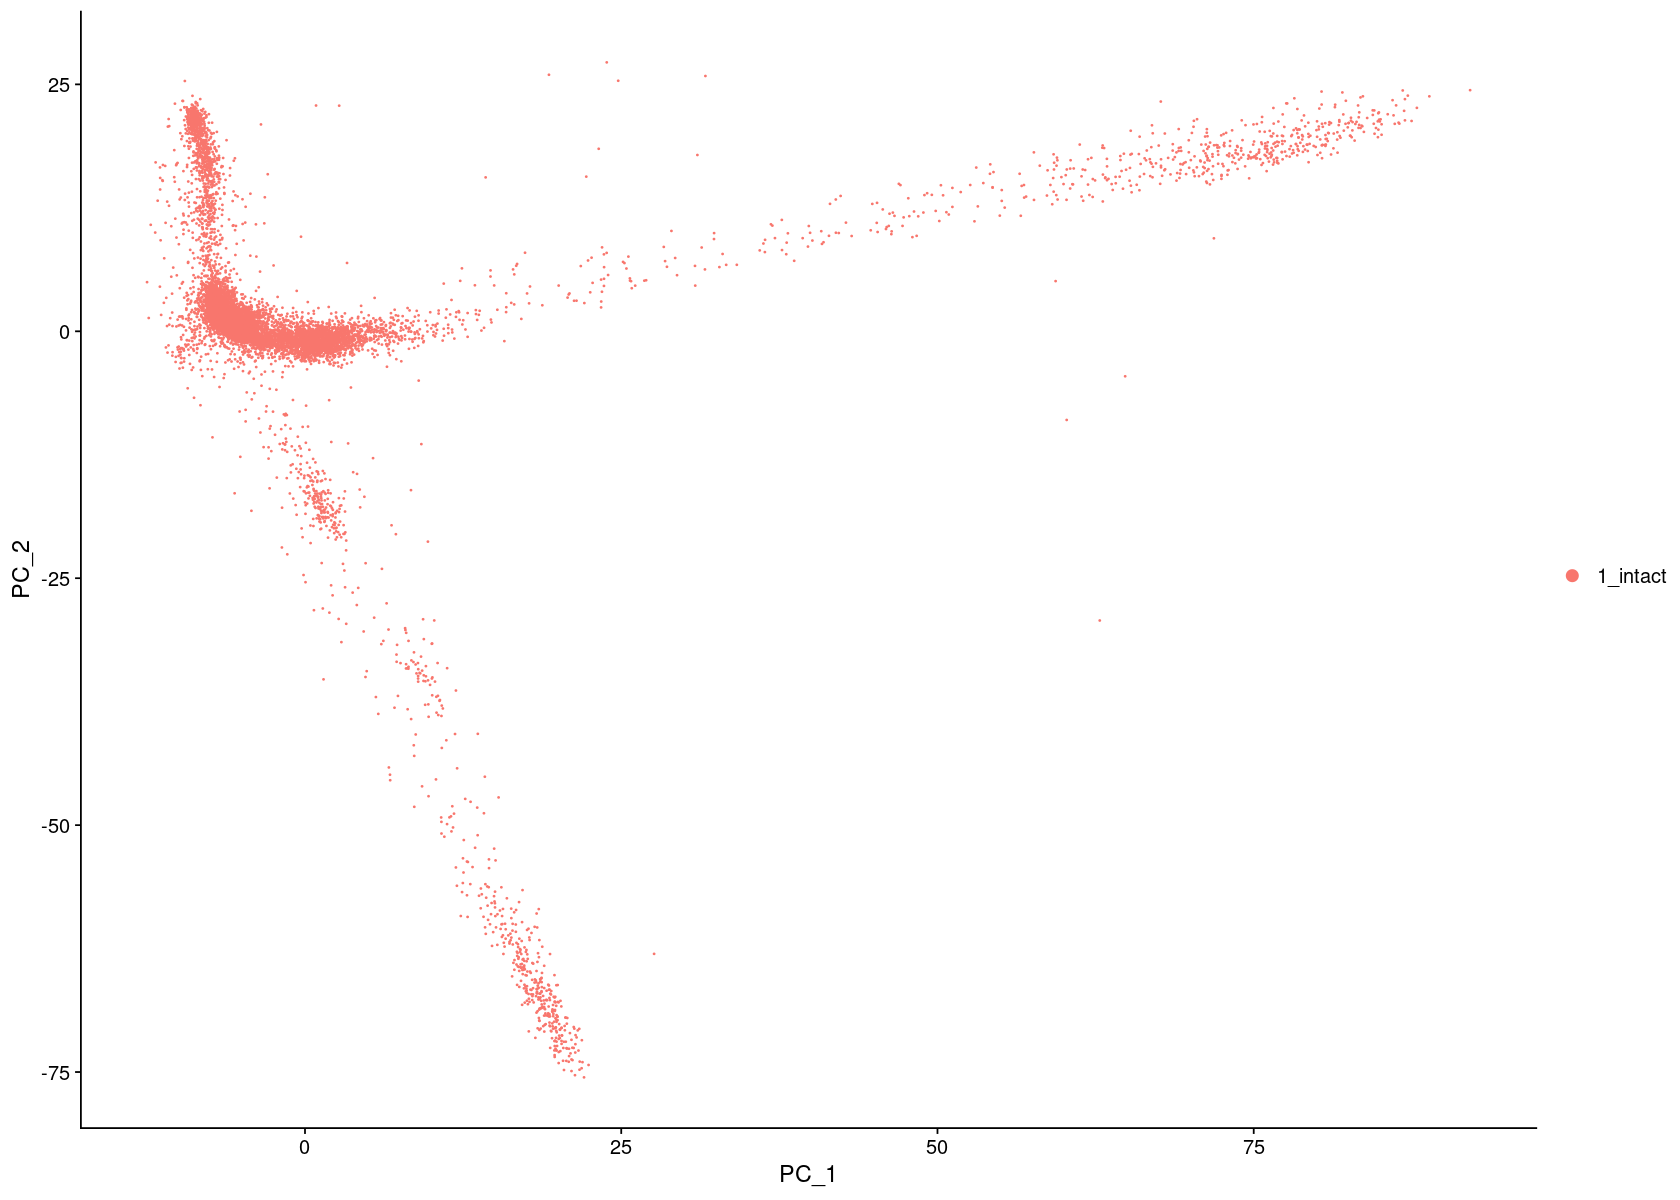

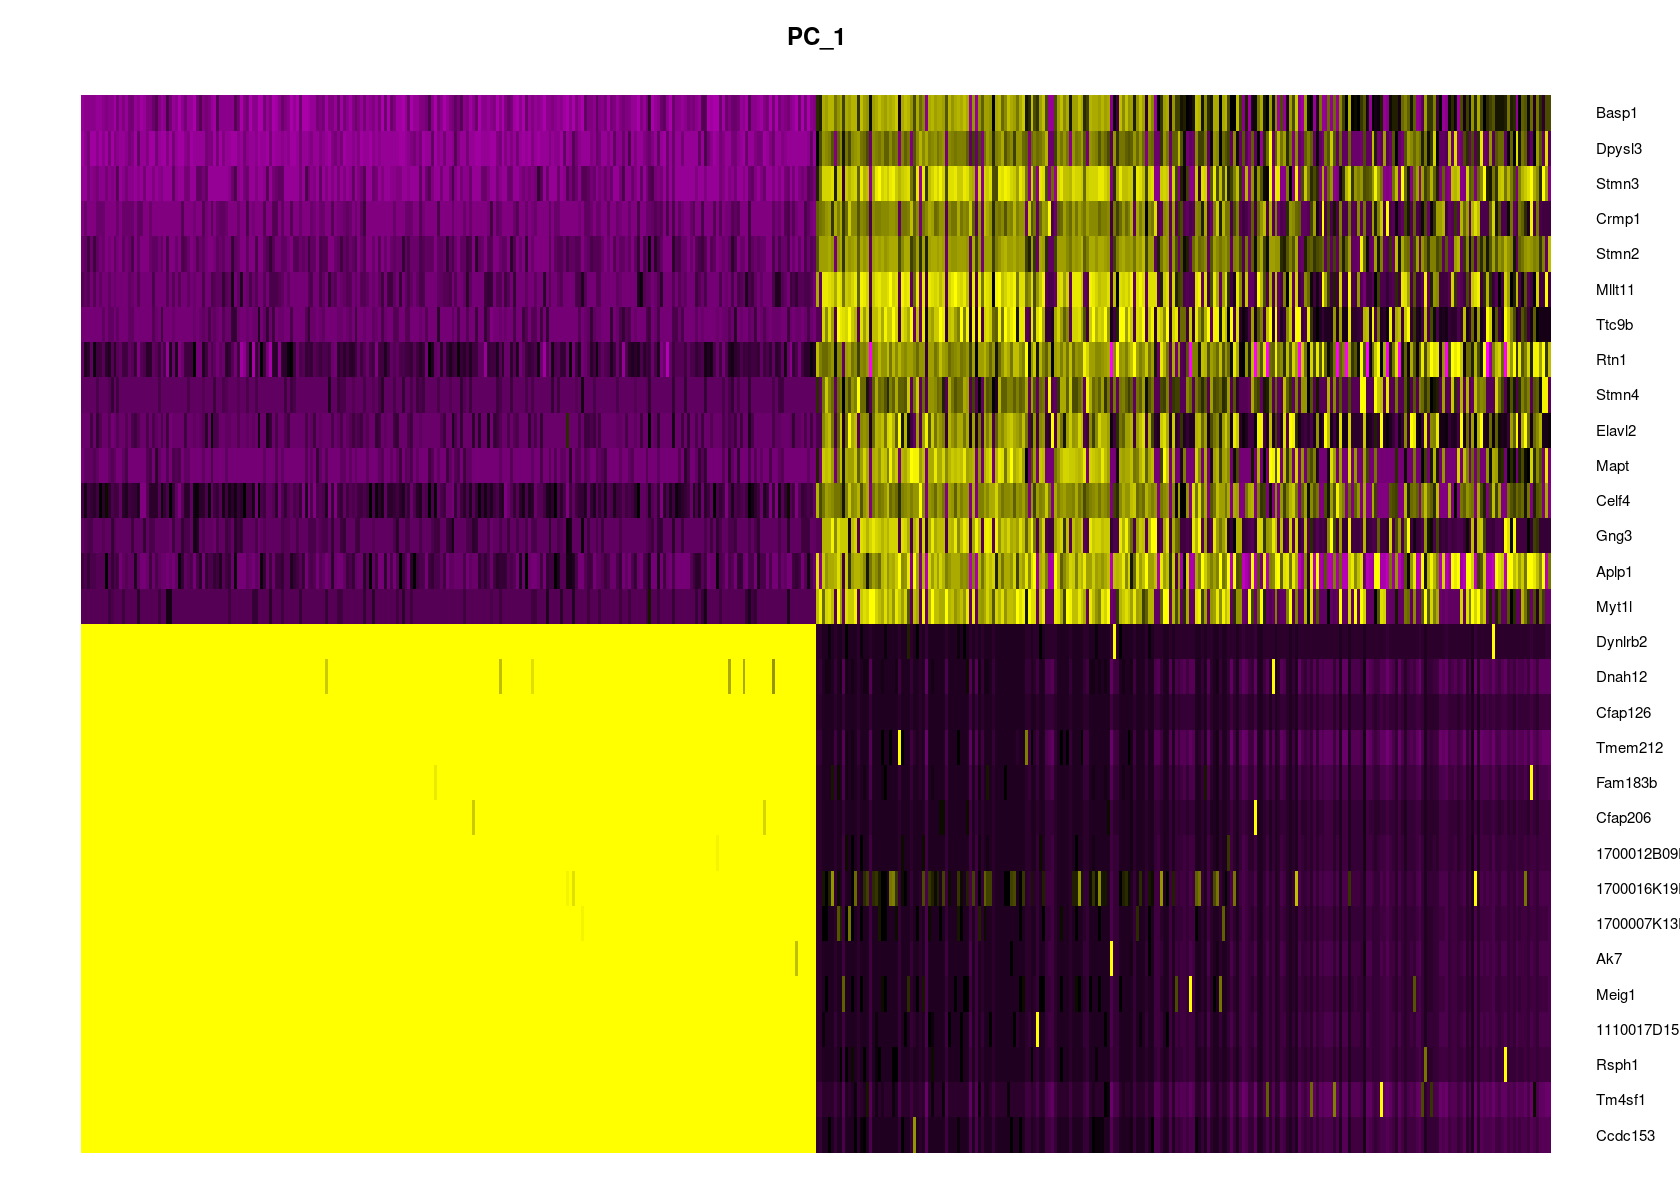

In [8]:
all.genes <- rownames(tmp)
tmp <- ScaleData(tmp, vars.to.regress = "percent.mt")
#tmp <- ScaleData(tmp, features=all.genes)


tmp <- RunPCA(tmp, features = VariableFeatures(object = tmp))
print(tmp[["pca"]], dims=1:5, nfeatures=5)

VizDimLoadings(tmp, dims=1:2, reduction="pca")

DimPlot(tmp, reduction="pca")

DimHeatmap(tmp, dims=1, cells=500, balanced=TRUE)

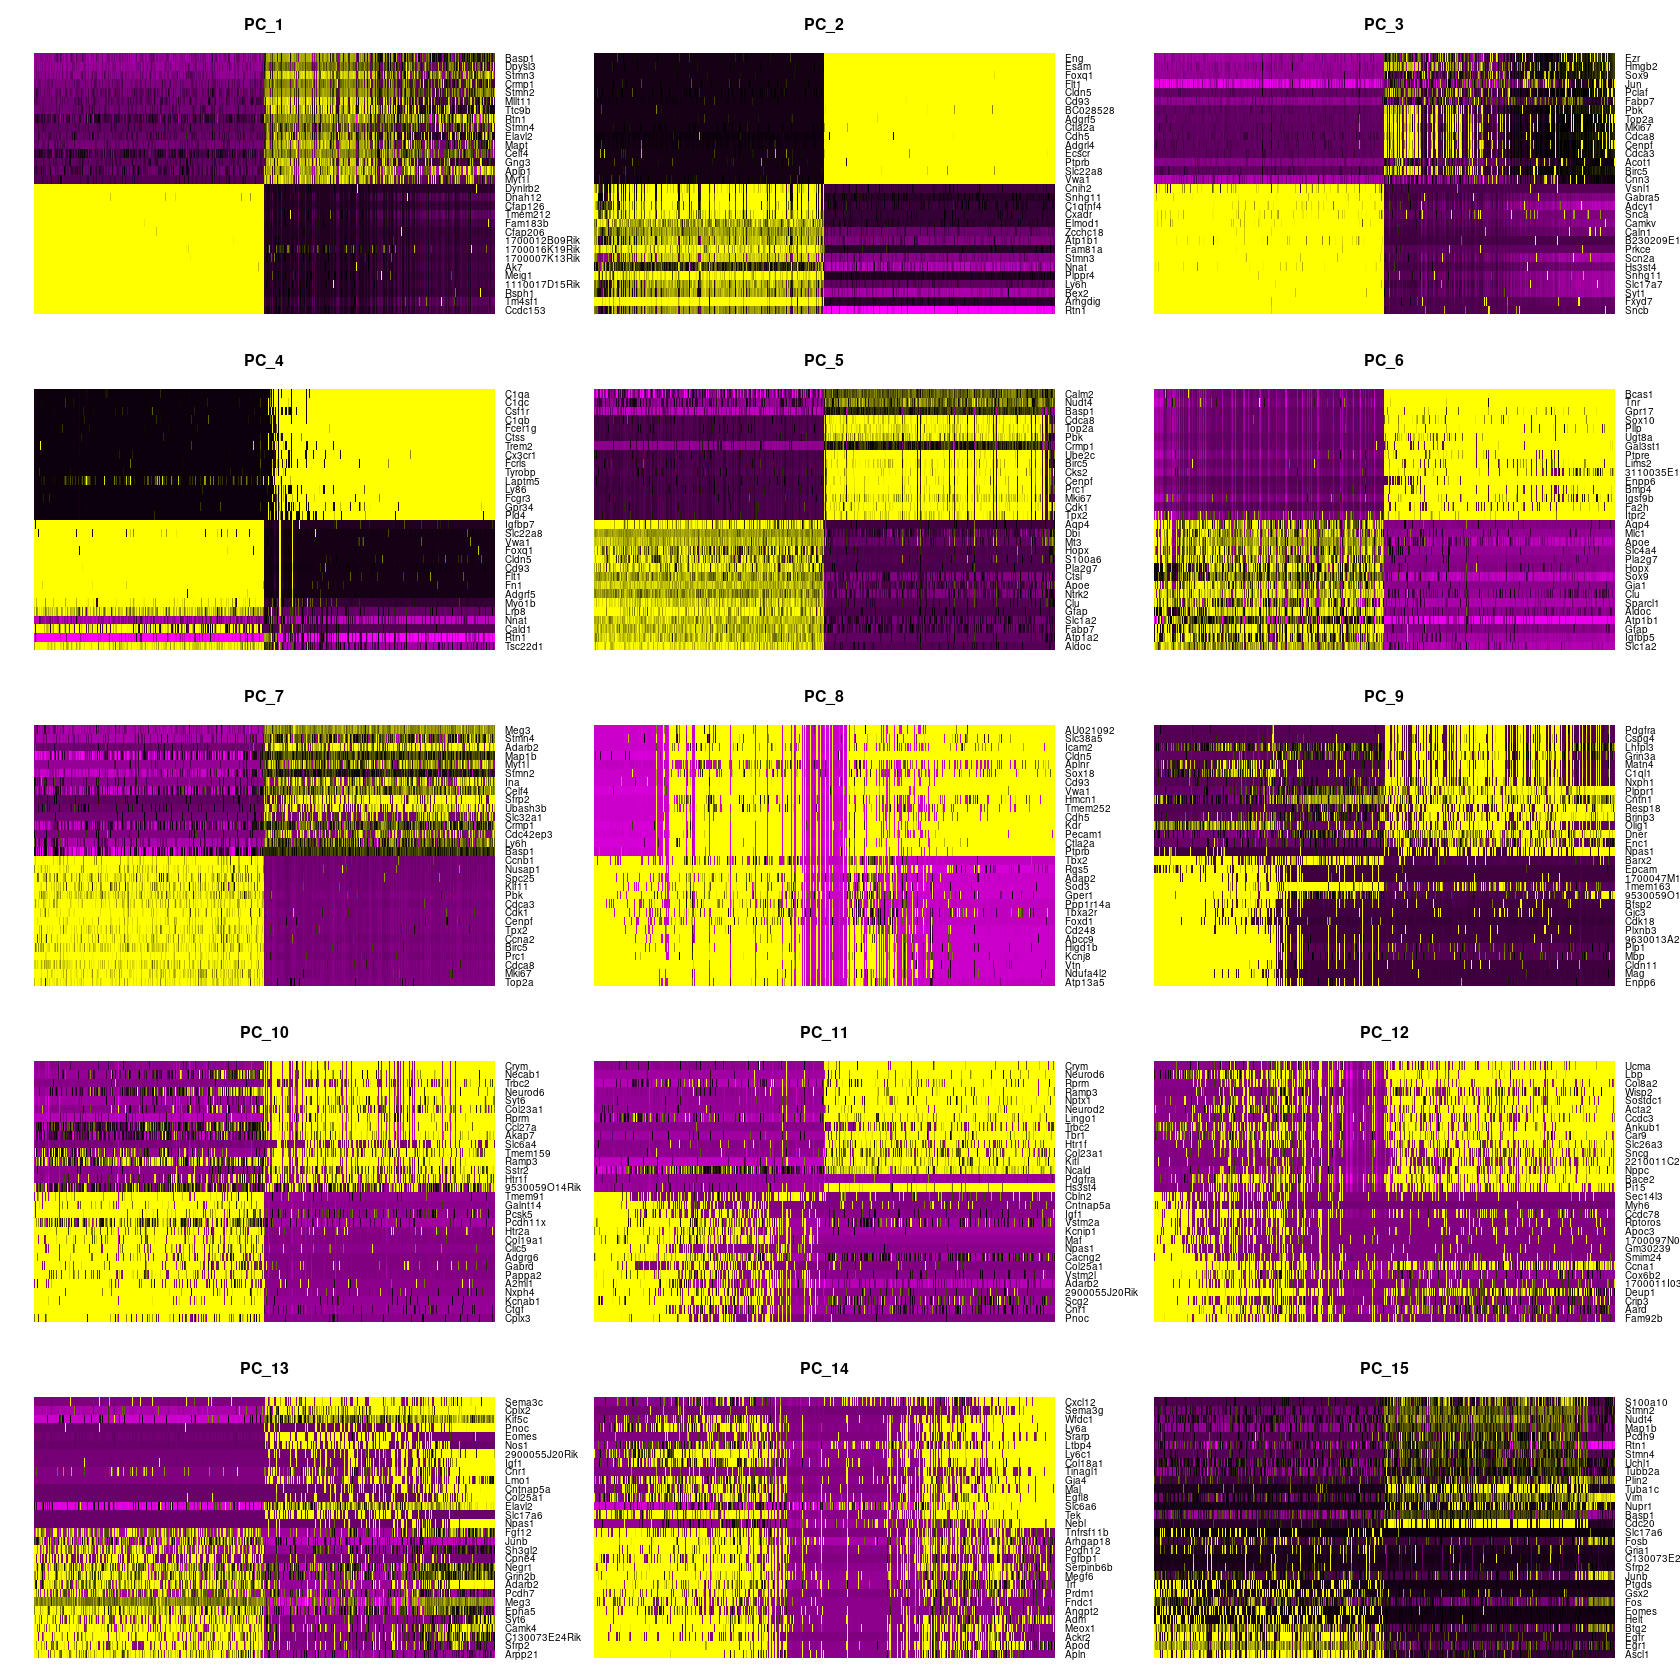

In [9]:
options(repr.plot.width=14, repr.plot.height=14)
DimHeatmap(tmp, dims=1:15, cells=500, balanced=TRUE)

Warning message:
“Removed 28000 rows containing missing values (geom_point).”


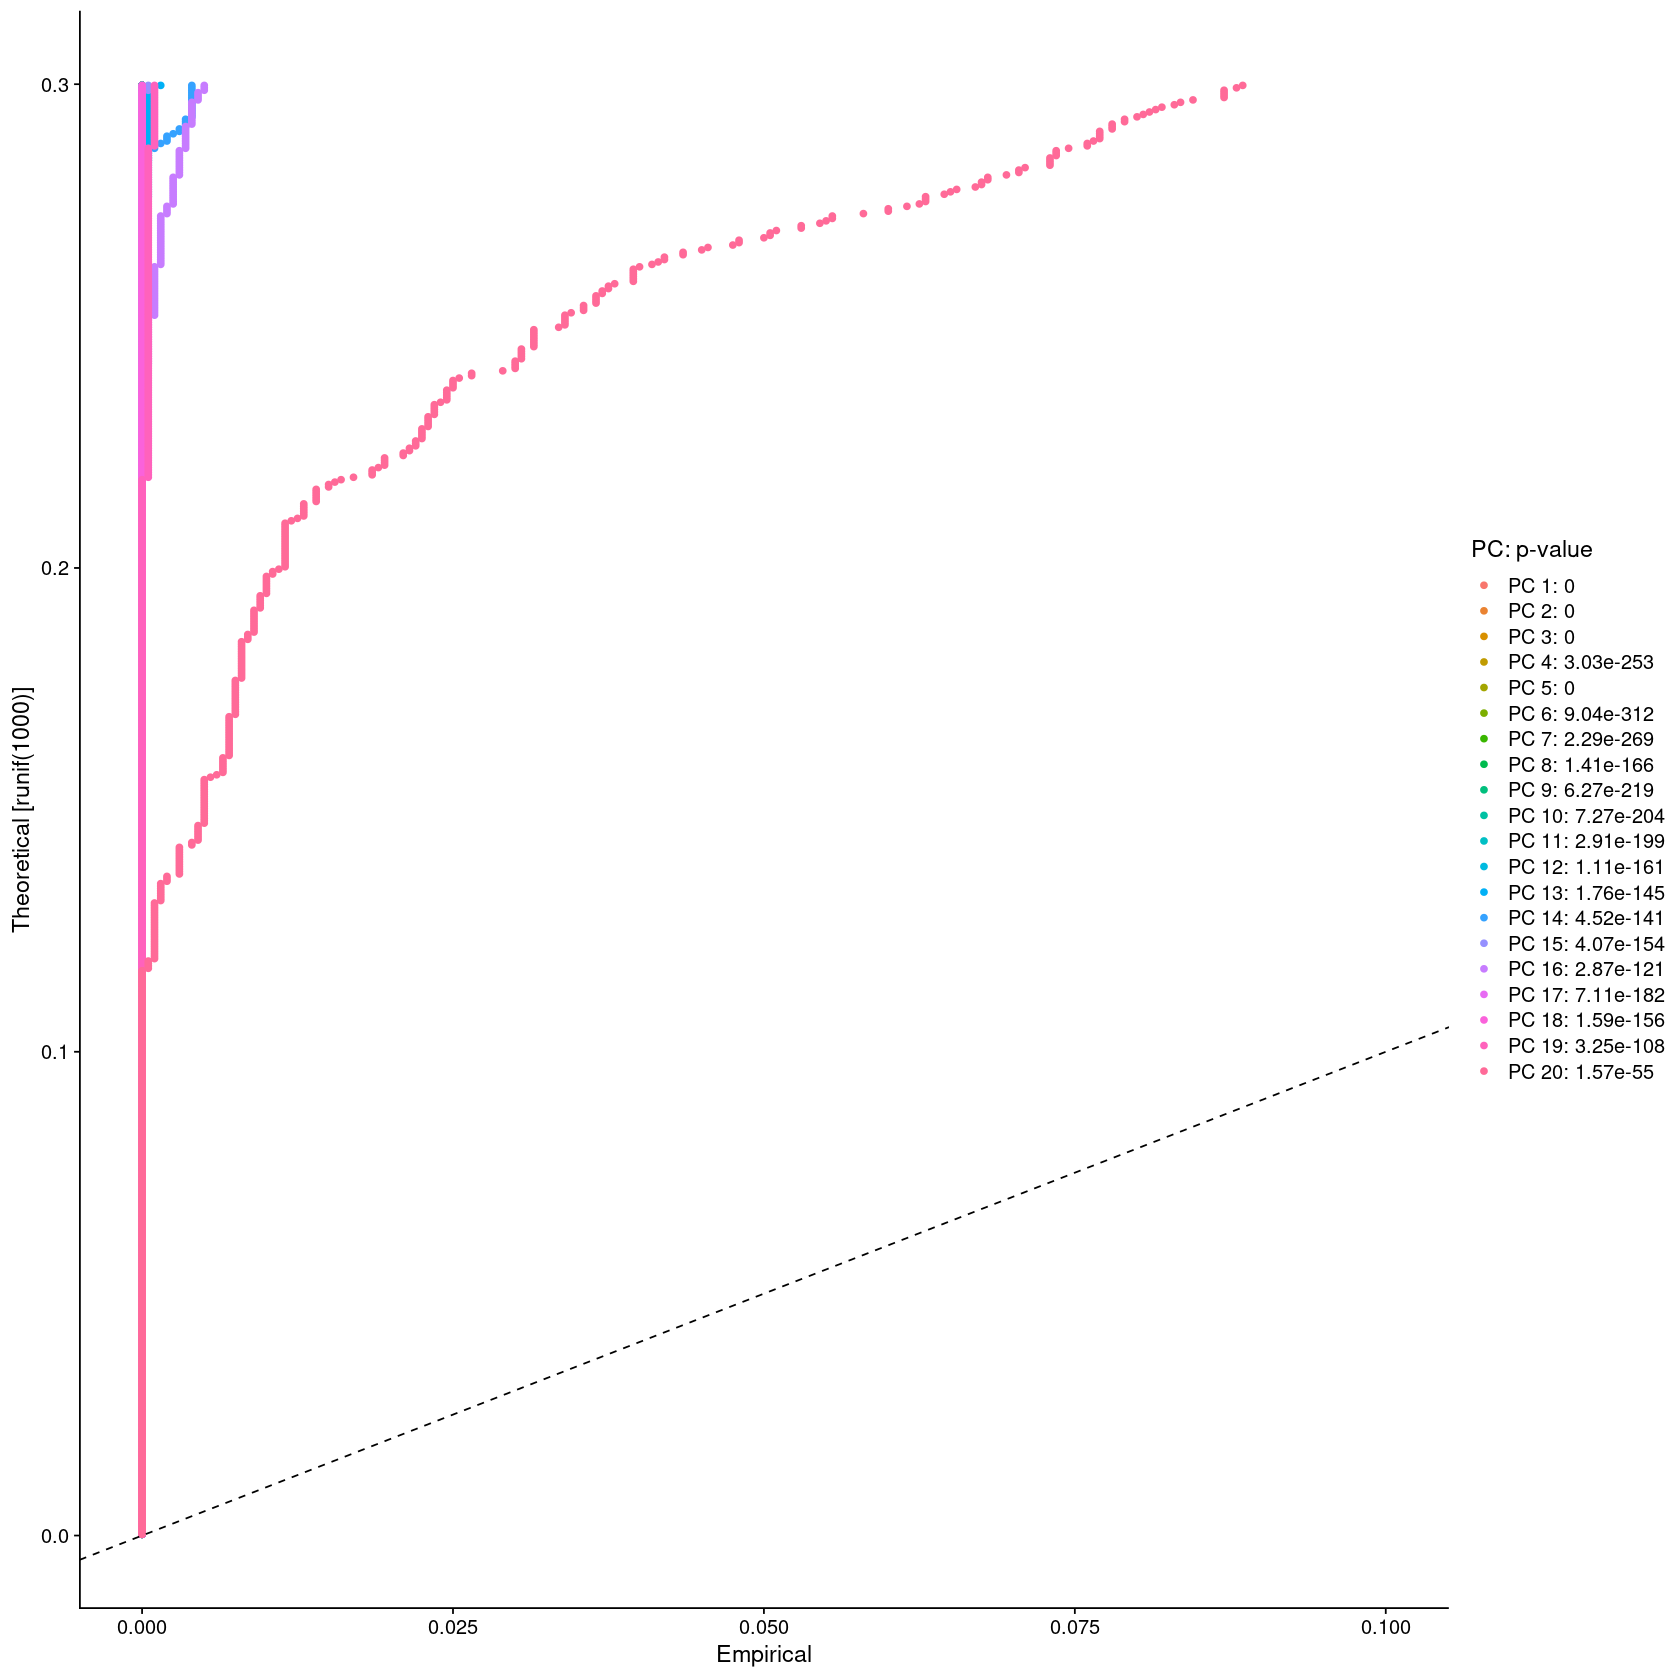

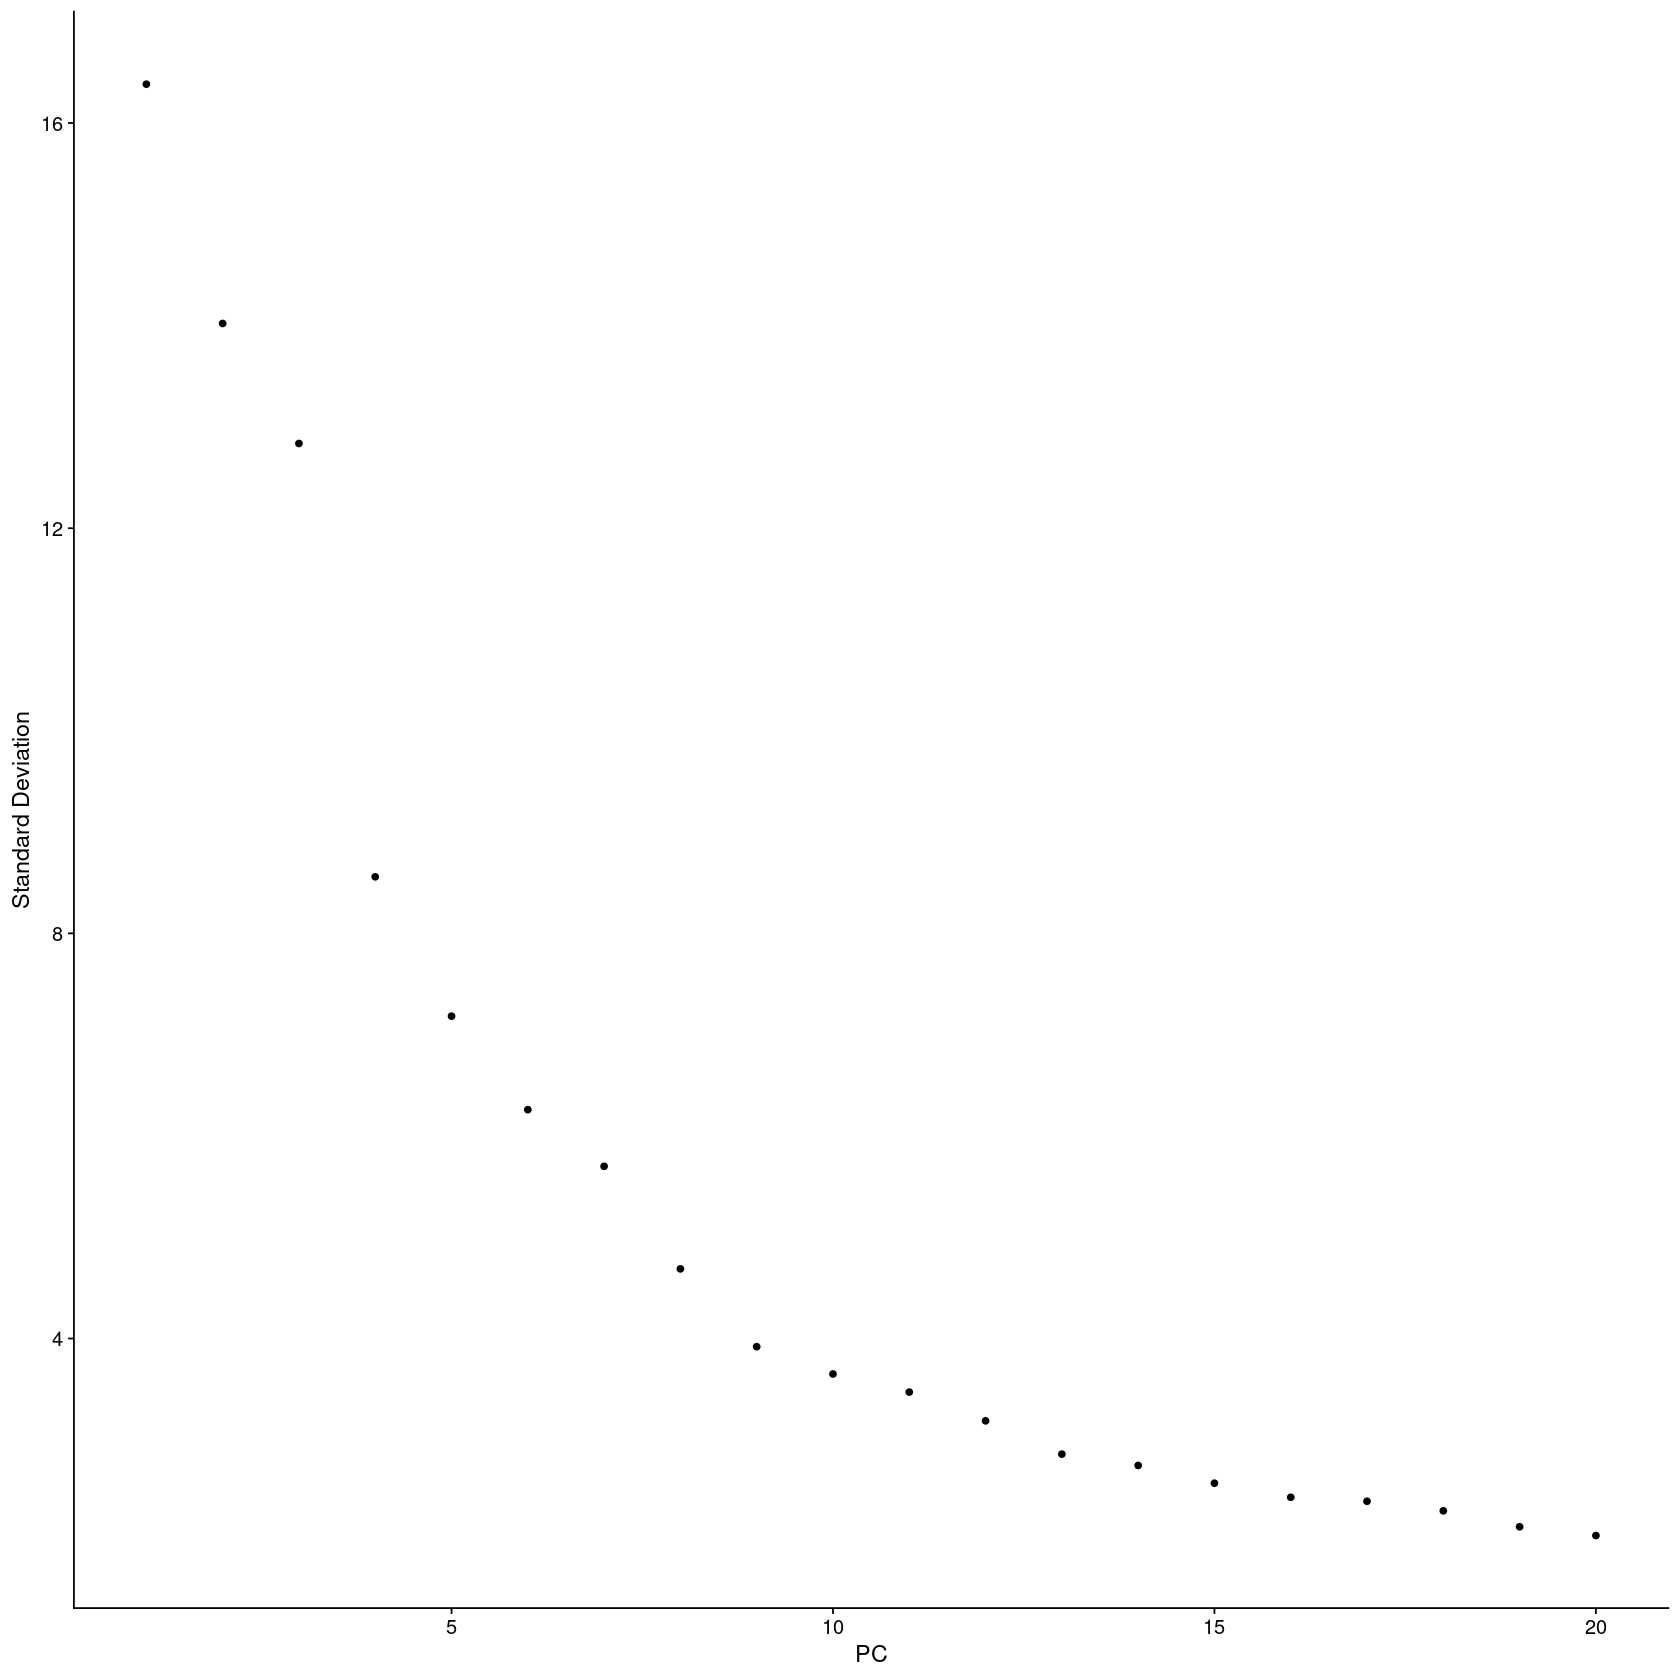

In [10]:
tmp <- JackStraw(tmp, num.replicate=100)
tmp <- ScoreJackStraw(tmp, dims=1:20)

JackStrawPlot(tmp, dims=1:20)

ElbowPlot(tmp)

In [11]:
arg10 <- 20 #maximum PC

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 12136
Number of edges: 441613

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9172
Number of communities: 27
Elapsed time: 13 seconds


AAACCCAAGAACTGAT AAACCCAAGAAGTATC AAACCCAAGAGATGCC AAACCCAAGAGGCCAT 
               1                9                2                8 
AAACCCAAGCGGTAAC 
               6 
27 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... 26

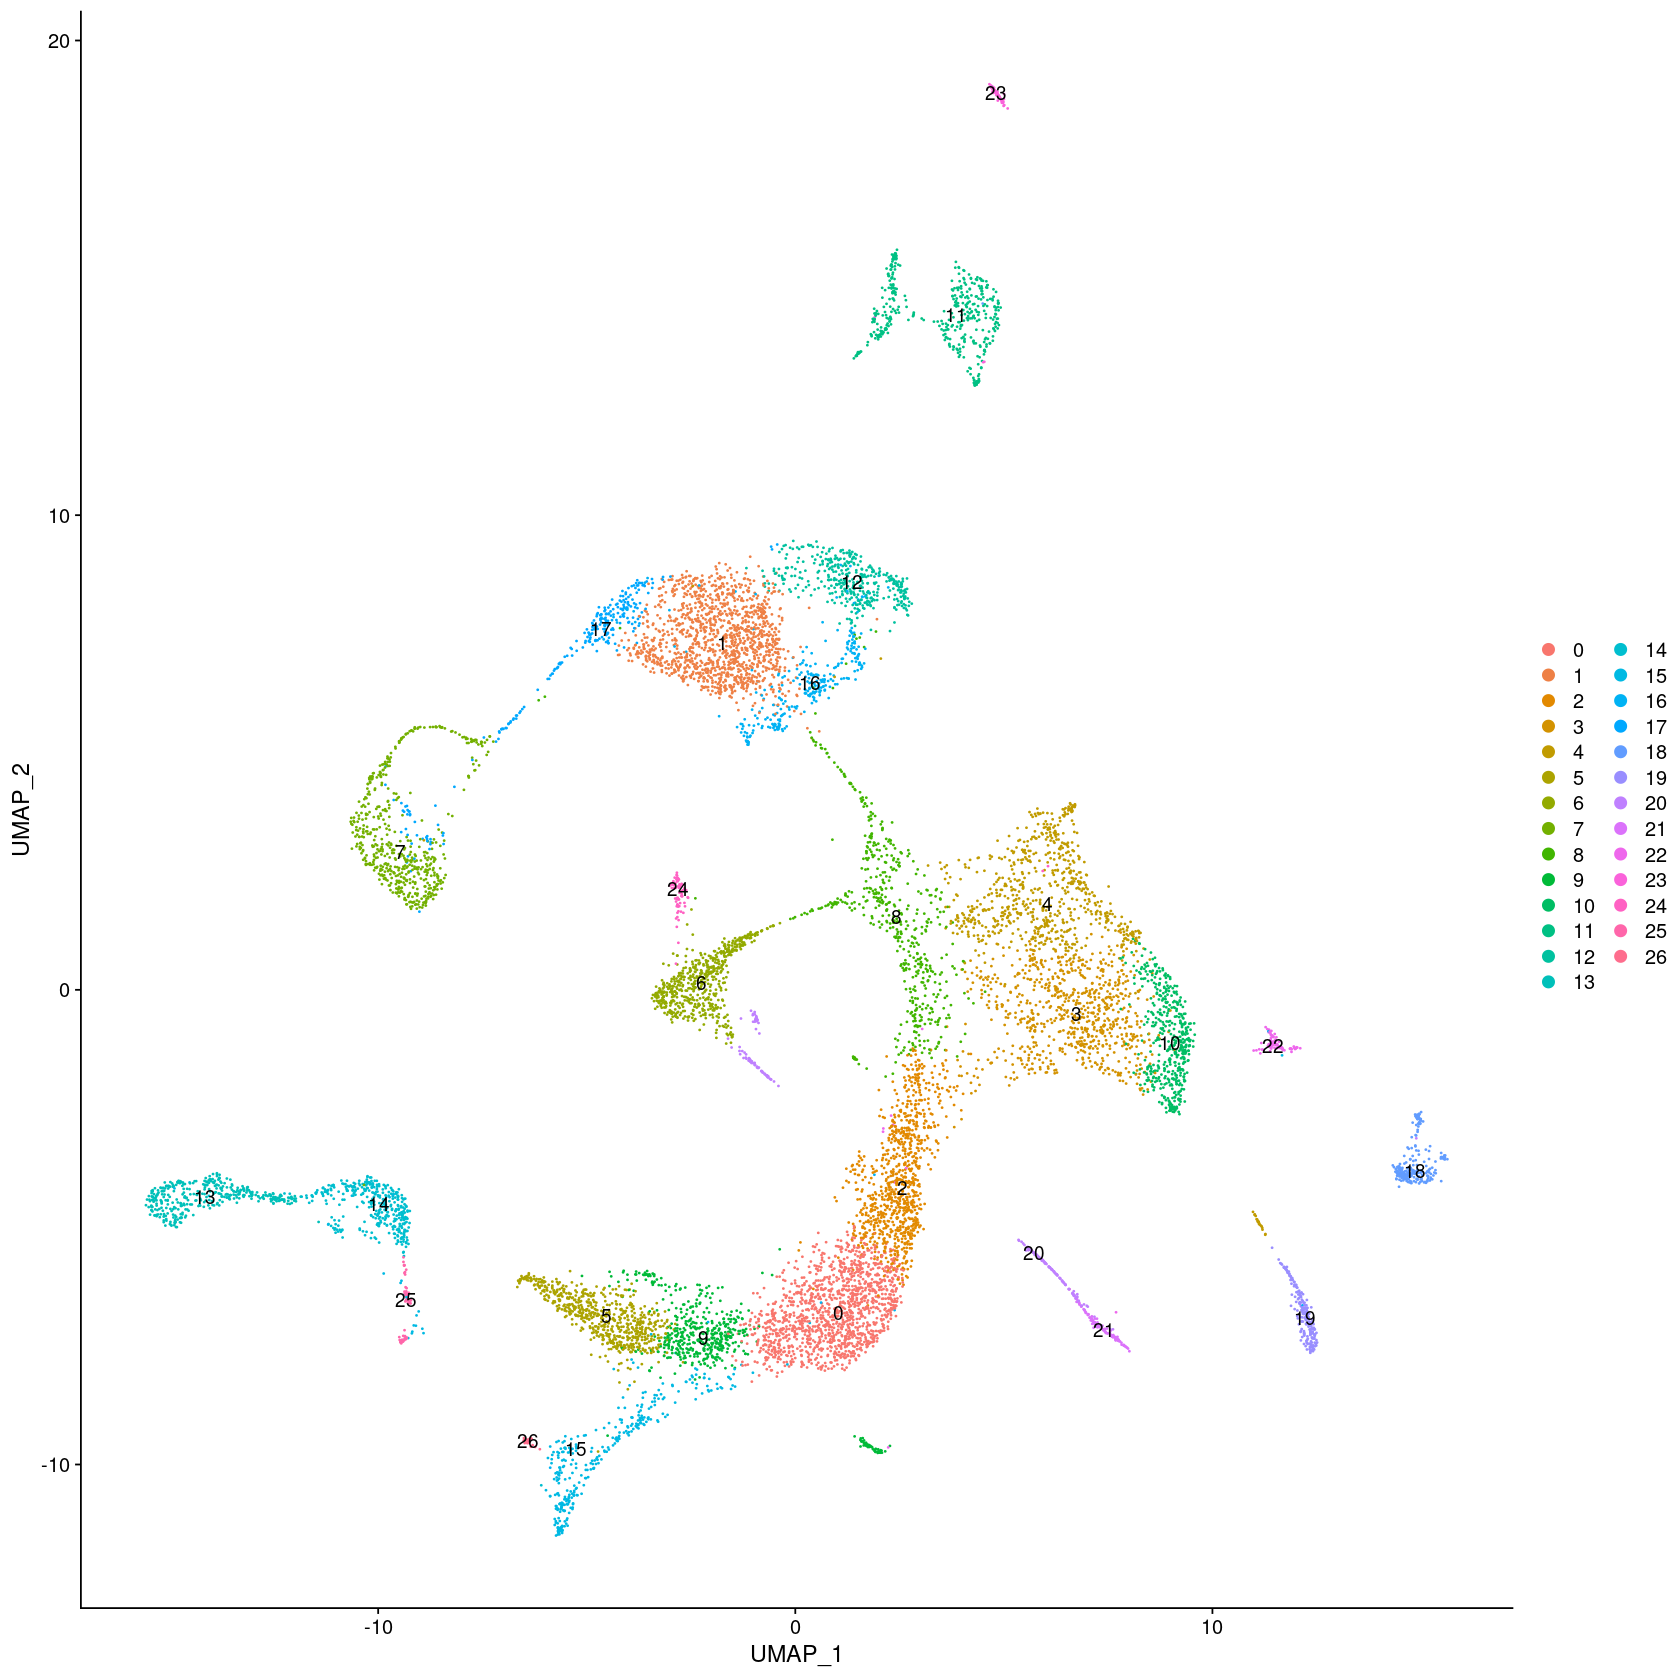

In [12]:
tmp <- FindNeighbors(tmp, dims=1:arg10)
tmp <- FindClusters(tmp, resolution=0.8)

head(Idents(tmp), 5)

tmp <- RunUMAP(tmp, dims=1:arg10, umap.method='umap-learn', metric='correlation')
DimPlot(tmp, reduction="umap", label=TRUE)

In [13]:
sample.markers <- FindAllMarkers(tmp, min.pct = 0.25, logfc.threshold = 0.25)
sample.markers %>% group_by(cluster) %>% top_n(n = 2, wt = avg_logFC)
markers10 <- sample.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15

Calculating cluster 16

Calculating cluster 17

Calculating cluster 18

Calculating cluster 19

Calculating cluster 20

Calculating cluster 21

Calculating cluster 22

Calculating cluster 23

Calculating cluster 24

Calculating cluster 25

Calculating cluster 26



p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
0.000000e+00,1.441102,0.985,0.456,0.000000e+00,0,Tiam2
0.000000e+00,1.285783,0.989,0.424,0.000000e+00,0,Dlx6os1
0.000000e+00,2.204589,1.000,0.929,0.000000e+00,1,Cst3
0.000000e+00,2.103221,1.000,0.429,0.000000e+00,1,Plpp3
0.000000e+00,1.340318,0.990,0.762,0.000000e+00,2,Ccnd2
0.000000e+00,1.144976,0.977,0.447,0.000000e+00,2,Dlx6os1
0.000000e+00,1.904057,0.892,0.232,0.000000e+00,3,Hist1h2ap
0.000000e+00,1.885925,0.859,0.227,0.000000e+00,3,Hist1h2ae
0.000000e+00,1.646129,0.981,0.253,0.000000e+00,4,Top2a


In [14]:
write.table(sample.markers, file=paste(arg03,'_all_markers.tsv',sep=''), sep='\t', na='', row.names=T, col.names=NA, quote=F)
write.table(markers10, file=paste(arg03,'_top10_markers.tsv',sep=''), sep='\t', na='', row.names=T, col.names=NA, quote=F)

In [16]:
saveRDS(tmp, file=arg04)

In [ ]:
#sample <- readRDS(file=args04)

In [ ]:
#From CellMarker
#cancer_marker <- list('CD44', 'CD22', 'SOX2', 'EPCAM')
#, 'ALDH1', 'CD133', 'ESA'
#for (i in cancer_marker){
#   p1 <- FeaturePlot(sample, features = i)
#    p2 <- VlnPlot(sample, features = i)
#    print(CombinePlots(plots = list(p1, p2)))
#}

In [ ]:
#From Dr.Nagasawa slide
#cancer_marker <- list('VIM', 'CD22', 'SOX2', 'EPCAM')
#, 'ALDH1', 'CD133', 'ESA'
#for (i in cancer_marker){
#    p1 <- FeaturePlot(sample, features = i)
#    p2 <- VlnPlot(sample, features = i)
#    print(CombinePlots(plots = list(p1, p2)))
#}